In [7]:
import pandas as pd
import numpy as np

data = {
    'Student Name': ['Amelie', 'Edgar', 'Jordi', 'Marçal', 'Pep', 'Jaume', 'Marco',
                     'Ludmila', 'Bastian', 'Marc', 'Gerardo', 'Javier', 'Frank', 'Julia'],
    'Course': ['Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision',
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision',
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision',
               'Artificial Intelligence', 'Python for Data Science'],
    'Grade': [85, 92, 78, 88, 91, 84, 73, 95, 90, 80, 85, 87, 89, 92],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female'],
    'Study Time': [15, 20, 10, 8, 18, 14, 11, 16, 19, 13, 16, 12, 17, 15],
    'Age': [22, 21, 23, 22, 20, 24, 22, 21, 23, 21, 22, 22, 21, 20]
}

df = pd.DataFrame(data)
df.head(5)

,Student Name,Course,Grade,Gender,Study Time,Age
0,Amelie,Artificial Intelligence,85,Female,15,22
1,Edgar,Python for Data Science,92,Male,20,21
2,Jordi,Cloud Computing,78,Male,10,23
3,Marçal,Computer Vision,88,Male,8,22
4,Pep,Artificial Intelligence,91,Male,18,20


### 1. Create a *lineplot* showing how **Study Time** varies by **Student Name**. Which student has the highest study time?

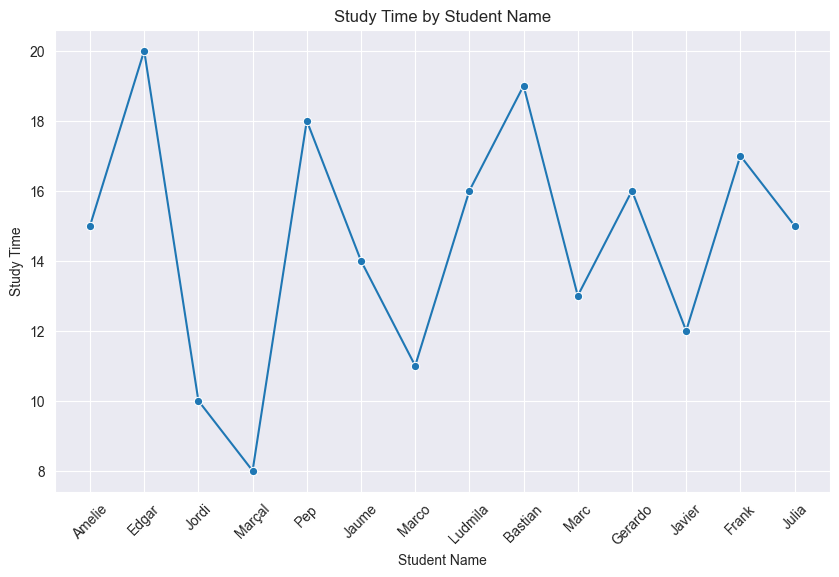

The student with the highest study time is: Edgar


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating the lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Student Name', y='Study Time', marker='o')

plt.xticks(rotation=45)
plt.title('Study Time by Student Name')
plt.xlabel('Student Name')
plt.ylabel('Study Time')

plt.show()

# finding the student(s) with the highest study time
max_study_time = df['Study Time'].max()
students_with_max_time = df.loc[df['Study Time'] == max_study_time, 'Student Name']

if len(students_with_max_time) > 1:
    print(f"The students with the highest study time are: {', '.join(students_with_max_time)}")
else:
    highest_study_time_student = students_with_max_time.iloc[0]
    print(f"The student with the highest study time is: {highest_study_time_student}")

### 2. Plot a histogram (*histplot*) of **Grade** and determine which grade range has the highest frequency of students.


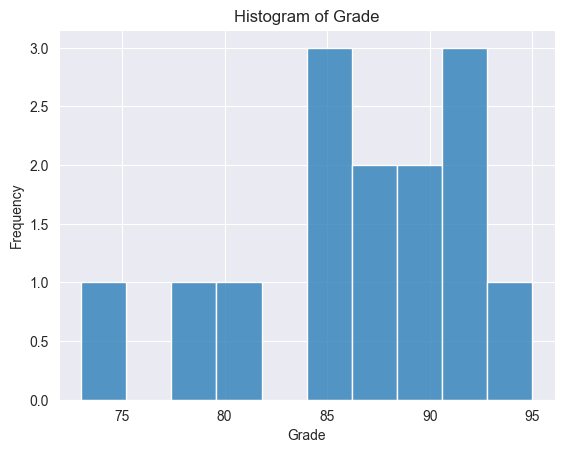

There are multiple grade ranges with the highest frequency of students: 85, 92


In [9]:
# Calculate the frequency of each grade
grade_counts = df['Grade'].value_counts()

# Determine the maximum frequency
max_frequency = grade_counts.max()

# find all grades with the maximum frequency
grades_with_max_frequency = grade_counts[grade_counts == max_frequency].index.tolist()

# plot the histogram
sns.histplot(df, x='Grade', bins=10)
plt.title('Histogram of Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

# print the result
if len(grades_with_max_frequency) > 1:
    grade_ranges_str = ', '.join([str(grade) for grade in grades_with_max_frequency])
    print(f"There are multiple grade ranges with the highest frequency of students: {grade_ranges_str}")
else:
    print(f"The grade range with the highest frequency of students is: {grades_with_max_frequency[0]}")

### 3. Create an ECDF plot (*ecdfplot*) for **Grade**. What is the percentage of students scoring less than 85?

The percentage of students scoring less than 85 is: 28.57142857142857%


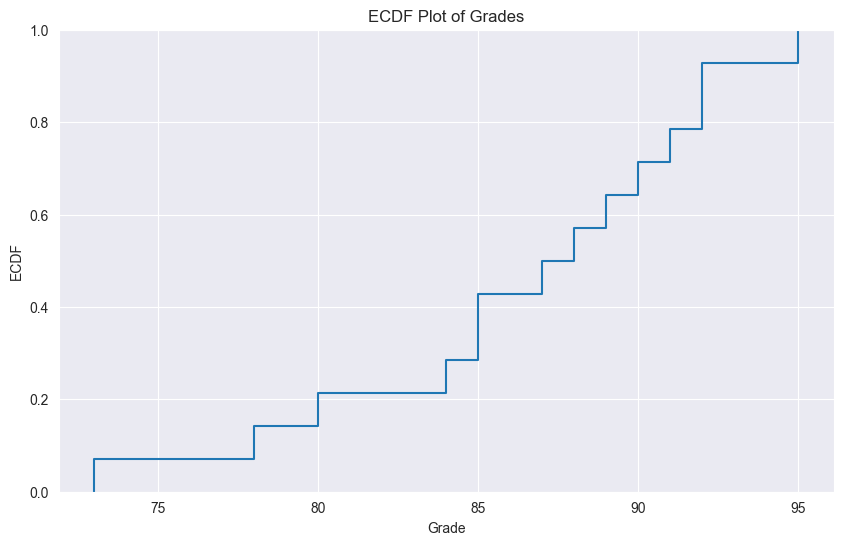

In [16]:
# create an ECDF plot for Grade
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='Grade')

plt.title('ECDF Plot of Grades')
plt.xlabel('Grade')
plt.ylabel('ECDF')

#ccalculate the percentage of students scoring less than 85
percentage_less_than_85 = (df['Grade'] < 85).mean() * 100

print(f"The percentage of students scoring less than 85 is: {percentage_less_than_85}%")

plt.show()

### 4. Create a *stripplot* showing **Grade** distribution for each **Course**. Which course has the most spread in grades?


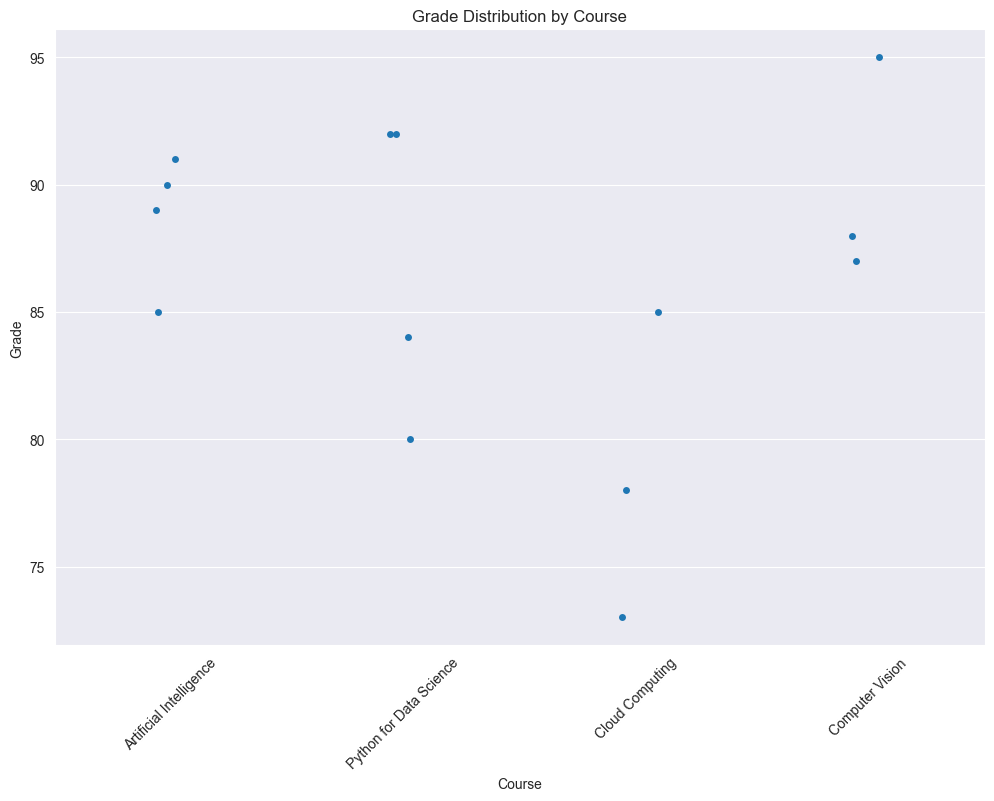

The course with the most spread in grades is: Cloud Computing


In [21]:
# Create a stripplot to show Grade distribution for each Course
plt.figure(figsize=(12, 8))
sns.stripplot(data=df, x='Course', y='Grade', jitter=True)

plt.title('Grade Distribution by Course')
plt.xlabel('Course')
plt.ylabel('Grade')
plt.xticks(rotation=45)

# showing the plot
plt.show()

# calculating the spread of grades for each course
spread_by_course = df.groupby('Course')['Grade'].agg(['min', 'max'])
spread_by_course['spread'] = spread_by_course['max'] - spread_by_course['min']

# determining the course with the most spread in grades
most_spread_course = spread_by_course['spread'].idxmax()
print(f"The course with the most spread in grades is: {most_spread_course}")

### 5. Create a *swarmplot* to show the relationship between Gender and **Study Time**. Which gender has a higher average study time?


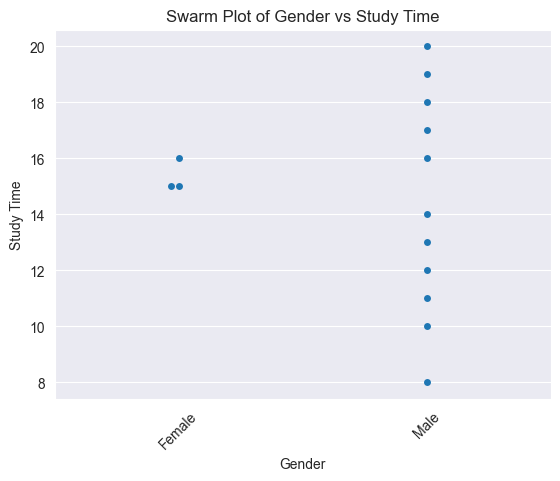

The gender with a higher average study time is: Female


In [24]:
# creating the swarmplot
sns.swarmplot(data=df, x='Gender', y='Study Time')
plt.title('Swarm Plot of Gender vs Study Time')
plt.xlabel('Gender')
plt.ylabel('Study Time')
plt.xticks(rotation=45)
plt.show()

# groupby
average_study_time_by_gender = df.groupby('Gender')['Study Time'].mean()


gender_with_higher_average = average_study_time_by_gender.idxmax()
print(f"The gender with a higher average study time is: {gender_with_higher_average}")


### 6. Plot a *pointplot* to show the average **Grade** for each Course. Which course has the highest average grade?


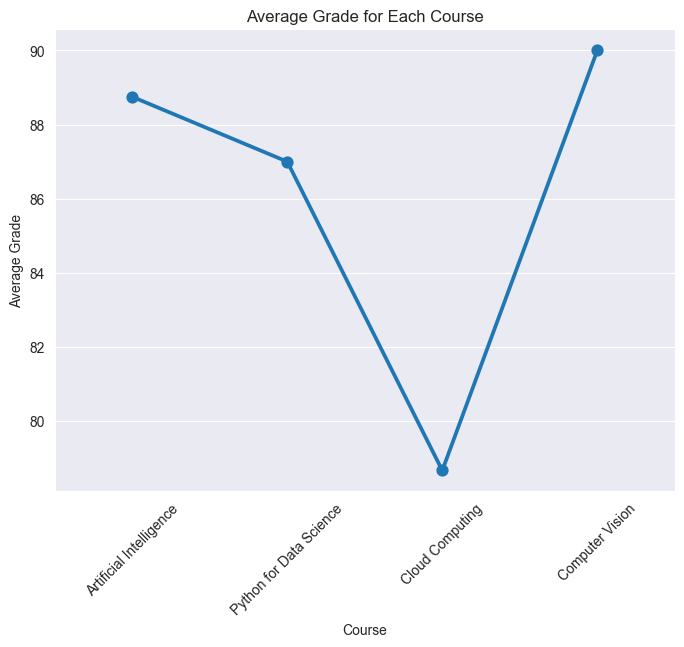

The course with the highest average grade is: Computer Vision


In [29]:

plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='Course', y='Grade', estimator='mean', errorbar=None)
plt.title('Average Grade for Each Course')
plt.xlabel('Course')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)
plt.show()

# calculating the average grade for each course
average_grade_by_course = df.groupby('Course')['Grade'].mean()

# determining the maximum average grade
max_average_grade = average_grade_by_course.max()

# finding all courses with the maximum average grade
courses_with_highest_average_grade = average_grade_by_course[average_grade_by_course == max_average_grade].index.tolist()

# printing the result
if len(courses_with_highest_average_grade) > 1:
    courses = ', '.join(courses_with_highest_average_grade)
    print(f"The courses with the highest average grade are: {courses}")
else:
    course_with_highest_average_grade = courses_with_highest_average_grade[0]
    print(f"The course with the highest average grade is: {course_with_highest_average_grade}")